### Problem 1 : Flip a Coin N Times
Write a function that simulates flipping a coin $n$ times.  
Print out "tails" or "heads" for each flip and let the program count the number of heads and print it, along with the fraction of heads, out at the end.  
(Hint: Use ```r = random.random()``` and define head as ```r >= 0.5```  
or draw an integer among ```[0, 1]``` with ```r = random.randint(0,1)``` and define head when `r` is `1`.) 

In [1]:
import numpy as np

def flip_coin(n):
    r = np.random.randint(0,1+1, n)
    print(r)
    success = (r == 1)
    print(success)

    num_heads = np.sum(success)
    print(num_heads)
    
flip_coin(10)

[1 1 0 1 1 1 1 0 1 0]
[ True  True False  True  True  True  True False  True False]
7


### Problem 2 : Decide if a Dice Game is Fair
Somebody suggests the following game. You pay 1 unit of money and are allowed to throw four dice. If the sum of the eyes on the dice is less than 9, you win 10 units of money, otherwise you lose your investment.  
Should you play this game?  
 a. Answer the question by writing a function that simulates the game with $n$ trials.  
 b. How many trials $n$ does it take to convince you?

In [2]:
import numpy as np

def game(n):
    
    sum_of_rolls = np.empty(n)
    
    for i in range(n):
        roll = np.random.randint(1, 7, 4)
        
        sum_of_rolls[i] = sum(roll)
        
    win = sum_of_rolls <= 8
    
    print('You won %d out of %d times' % (sum(win), n))
    print('You won', sum(win)*10, 'dollars and lost', n-sum(win), 'dollars')
    
game(1000)



You won 57 out of 1000 times
You won 570 dollars and lost 943 dollars


It took about 100 trials to convince me...I always lost much more than I won :(

### Problem 3 : Statistics of a Random Walk
Write a function which starts at the origin and take a 2-D random walk.
a.  To increase the amount of randomness, independently choose random values for $\Delta x^\prime$ and
$\Delta y^\prime$ in the range $[-1, 1]$. Then normalize them so that each step is of unit length:
$$
\Delta x = \frac{1}{L}\Delta x^\prime, \qquad
\Delta y = \frac{1}{L}\Delta y^\prime, \qquad
L=\sqrt{\Delta x^{\prime 2}+\Delta y^{\prime 2}}
$$
Plot maps of several independent 2-D random walks, each of 1000 steps.  Figure out how to get equal scales for the axes in your plot.  Using evidence from your simulations, comment on whether these look like what you would expect of a random walk.
b. If you have your walker taking $n$ steps in a single trial, then conduct a total number $K\approx \sqrt{n}$ of trials. Each trial should have $n$ steps and start with a different seed. Calculate the net distance squared, $R^2$, for each trial and then take the average of $R^2$ for all your $K$ trials:
$$
\left\langle R^2(n) \right\rangle = \frac{1}{K}\sum_{k=1}^{K}R_k^2(n)
$$
Plot the root-mean-square distance $R_{\rm rms} = \sqrt{\left\langle R^2(n) \right\rangle}$ as a function of $\sqrt{n}$. If you vectorize the algorithm for speed, you should be able to plot from $n=1$ to $n=1000$ with steps of $1$ and $K=100$. What is the apparent relation between $\sqrt{n}$ and $R_{\rm rms}$? Is it what you expect?

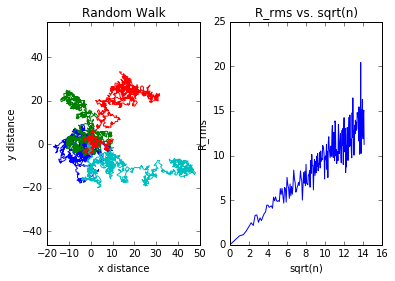

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math, random

def take_step(x, y):
    delta_x, delta_y = random.uniform(-1, 1), random.uniform(-1, 1)
    L = math.sqrt(delta_x**2 + delta_y**2)
    delta_x /= L
    delta_y /= L
    
    x += delta_x
    y += delta_y
    
    return x, y

def walk(n, plot=False):
    x_data = np.empty(n)
    y_data = np.empty(n)
    x, y = 0, 0
    
    for i in range(n):
        x, y = take_step(x, y)
        x_data[i], y_data[i] = x, y 
        
    if plot:
        plt.plot(x_data, y_data)
        plt.title('Random Walk')
        plt.xlabel('x distance')
        plt.ylabel('y distance')
    
    else:
        return x**2 + y**2   
    
def part_b(N):
    R_rms =np.empty(N)
    root_n = np.empty(N)
    K = int(np.sqrt(N))
    
    for i in range(N):
        total = 0
        
        for j in range(K):
            total += walk(i)
            
        R_rms[i] = np.sqrt(total/K)
        root_n[i] = np.sqrt(i)
        
    plt.plot(root_n, R_rms)
    plt.title("R_rms vs. sqrt(n)")
    plt.xlabel("sqrt(n)")
    plt.ylabel("R_rms")
    
plt.subplot(121)
walk(1000, True)
walk(1000, True)
walk(1000, True)
walk(1000, True)
plt.axis('equal')

plt.subplot(122)
part_b(200)        
        

### Problem 4 : 2-D Random Walk with Walls
The motion of a molecule in a box of gas, where there are collisions between molecules and between the molecules and the walls, can be approximately simulated as a constrained random walk. Write a modified random walk function so that the walker cannot walk outside a rectangular area $A = {\rm width} \times {\rm height}$. Do not move the particle if its new position is outside $A$. The function should take the dimensions of the $A$ (width and height) and the number of steps to take $n$ as inputs. Include an image of a plot that shows the random walk "bouncing off the walls" many times (e.g. ${\rm width}={\rm height}=5.0$ and $N=1000$ steps).  
Make your plot have equal aspect ratio.

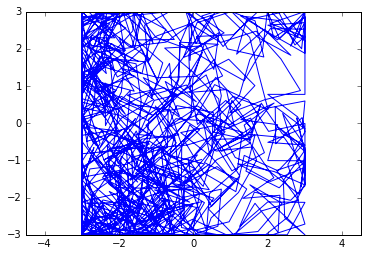

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math, random

def take_step(x, y):
    delta_x, delta_y = random.uniform(-1, 1), random.uniform(-1, 1)
    L = math.sqrt(delta_x**2 + delta_y**2)
    delta_x /= L
    delta_y /= L
    
    x += delta_x
    y += delta_y
    
    if x > 3:
        x = 3
        
    elif x < -3:
        x = -3
        
    if y > 3:
        y = 3
        
    elif y < -3:
        y = -3
        
    return x, y

def walk(n, plot=False):
    x_data = np.empty(n)
    y_data = np.empty(n)
    x, y = 0, 0
    
    for i in range(n):
        x, y = take_step(x, y)
        x_data[i], y_data[i] = x, y 
        
    if plot:
        plt.plot(x_data, y_data)
        plt.axis('equal')
        plt.title('Walk with walls')
    
    else:
        return x**2 + y**2
    
walk(1000, True)

### Problem 5 : Radioactive Decay
Write a function to simulate radioactive decay using the example in class.  
a. Plot the logarithm of the number of atoms of the original isotope left $\log{N(t)}$ and the logarithm of the decay rate $\log{\Delta N(t)}$ versus time by setting ```y_scale='log'``` in your plot.  
Note that the simulation measures time in steps of $\Delta t$ (generation number). What is the relationship between $\log{N(t)}$ and $\log{\Delta N(t)}$, based on the plots? Is this expected?  
For good statistics, try starting the simulation with $N=100,000$ and stopping when $N$ is $1000$ or less, with $\lambda\approx 0.01$.  
b. Show analytically and create a plot showing that within the expected statistical variations, $N(t)$ and $\Delta N(t)$ are proportional [plot $N(t)/\Delta N(t)$ with the same parameters as in (a)]. Use a linear scale.  
c. Create a plot with two values of $N(0)$ (e.g. $N_1=10,000$ and $N_2=100$) and three values of $\lambda$ (e.g. $\lambda=0.04, 0.02, 0.01$) showing that the slopes of $N(t)$ versus $t$ are independent of $N(0)$ and showing that the slopes are proportional to $\lambda$. Don't stop the simulation until all the atoms have decayed. Use a log scale in $y$.  
d. How does your simulation show that the decay is exponential-like and not a power law such as $N = \beta t^{-\alpha}$?

a) log(N(t)) and log(deltaN(t)) have logarithmic linear relationships, and they both decrease at roughly the same rate.

b) There is clearly a linear relationship between the atoms left and the atoms that were decay in each loop.

d) The graphs are roughly linear when plotted with a logarithmic y scale, so that means they have an exponential relationship in a normal scale.

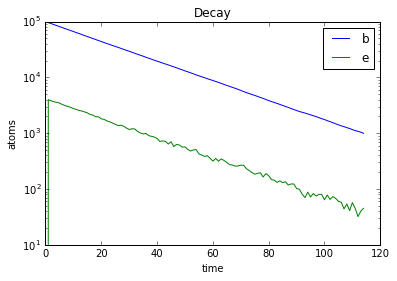

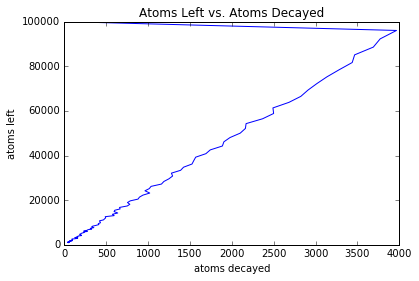

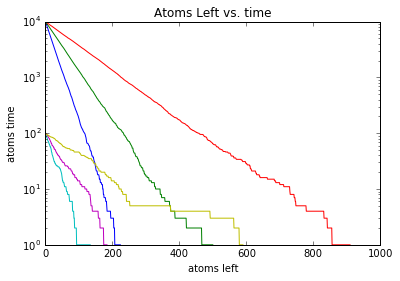

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math, random

def part_a(n, rate):
    atoms = [n]
    atoms_decayed = [0]
    time = [0]
    t = 0
    
    while n > 1000:
        decay_count = 0
        
        for i in range(n):
            r_i = random.uniform(0, 1)
            
            if r_i < rate:
                n -=1
                decay_count += 1

        atoms.append(n)
        atoms_decayed.append(decay_count)
        t += 1
        time.append(t)
        
    plt.plot(time, atoms, label='atoms left')
    plt.plot(time, atoms_decayed, label='rate of decay')
    plt.yscale('log')
    plt.title('Decay')
    plt.xlabel('time')
    plt.ylabel('atoms')
    plt.legend('best')
    plt.show()

    
def part_b(n, rate):
    atoms = [n]
    atoms_decayed = [0]
    time = [0]
    t = 0
    
    while n > 1000:
        decay_count = 0
        
        for i in range(n):
            r_i = random.uniform(0, 1)
            
            if r_i < rate:
                n -=1
                decay_count += 1

        atoms.append(n)
        atoms_decayed.append(decay_count)
        t += 1
        time.append(t)
        
    plt.plot(atoms_decayed, atoms)
    plt.title('Atoms Left vs. Atoms Decayed')
    plt.xlabel('atoms decayed')
    plt.ylabel('atoms left')
    plt.show()
    
def part_c(n, rate):
    atoms = [n]
    atoms_decayed = [0]
    time = [0]
    t = 0
    
    while n > 0:
        decay_count = 0
        
        for i in range(n):
            r_i = random.uniform(0, 1)
            
            if r_i < rate:
                n -=1
                decay_count += 1

        atoms.append(n)
        atoms_decayed.append(decay_count)
        t += 1
        time.append(t)
        
    plt.plot(time, atoms)
    plt.title('Atoms Left vs. time')
    plt.xlabel('atoms left')
    plt.ylabel('atoms time')
    plt.yscale('log')
     
part_a(100000, 0.04)
part_b(100000, 0.04)
part_c(10000, 0.04)
part_c(10000, 0.02)
part_c(10000, 0.01)
part_c(100, 0.04)
part_c(100, 0.02)
part_c(100, 0.01)